In [1]:
from specialist_data import transformed
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

data = transformed.data.copy()

def set_classifier():
    return  MLPClassifier(
        hidden_layer_sizes=(64,64,64,64,64),
        alpha=0.000001,
        max_iter=2000,
        activation="tanh",
        verbose=10,
        random_state=42,
        tol=0.000005
    )

def evolve_stage(clf, stage, interval):
    train_data = data.query(f'index > {stage}000 and index < {stage + interval}000')
    test_data = data.query(f'index > {stage + interval}000 and index < {stage + interval*2}000')
    transformed.set_data(train_data)
    clf = clf.partial_fit(transformed.X, transformed.level, ['bad', 'good'])
    transformed.set_data(test_data)
    return clf.score(transformed.X, transformed.level)

def evolve_process(clf, interval=2):
    results = []
    stages = []
    max_gen = 40 - (interval * 2)
    for stg in range(8, max_gen, interval):
        r = evolve_stage(clf, stg, interval)
        results.append(int(r*100))
        stages.append(stg*1000)
    return stages, results

Iteration 1, loss = 0.45728789
Iteration 2, loss = 0.10301180
Iteration 3, loss = 0.90253964
Iteration 4, loss = 1.16744351
Iteration 5, loss = 0.83273924
Iteration 6, loss = 0.68911618
Iteration 7, loss = 0.71994237
Iteration 8, loss = 0.68134092
Iteration 9, loss = 0.68243465
Iteration 10, loss = 0.67385229
Iteration 11, loss = 0.65019977
Iteration 12, loss = 0.65502672
Iteration 13, loss = 0.62640857
Training loss did not improve more than tol=0.000005 for 10 consecutive epochs. Stopping.
Iteration 14, loss = 0.60316034
Training loss did not improve more than tol=0.000005 for 10 consecutive epochs. Stopping.
Iteration 15, loss = 0.63381739
Training loss did not improve more than tol=0.000005 for 10 consecutive epochs. Stopping.
Iteration 16, loss = 0.63170470
Training loss did not improve more than tol=0.000005 for 10 consecutive epochs. Stopping.
Iteration 17, loss = 0.62594649
Training loss did not improve more than tol=0.000005 for 10 consecutive epochs. Stopping.
Iteration 18, l

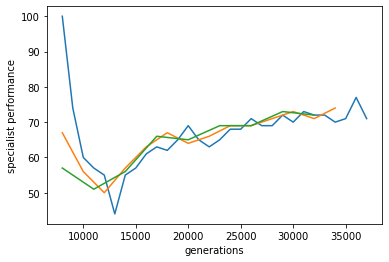

In [2]:
import matplotlib.pyplot as plt

for i in range(1,4):
    clf = set_classifier()
    stages, results, = evolve_process(clf, i)
    plt.plot(stages, results)

plt.xlabel('generations')
plt.ylabel('specialist performance')
plt.show()